In [121]:
import numpy as np
from roulette import *
import strategies as strat

In [122]:
min_bet = 20
num_games = 100000
num_spins = 100
game_type = 'French'
factory = strat.RouletteStrategyFactory(min_bet)
strategy = factory.get('Martingale')

In [123]:
game_totals = []
game_histories = []
freq = defaultdict(int)
redblack = defaultdict(int)
runs = defaultdict(list)
for x in range(num_games):
    sim = RouletteSim(max_num_spins=num_spins,
                      min_bet=min_bet,
                      game_type=game_type,
                      strategy=strategy,
                      plot_results=False)
    running_total, game_history = sim.play(freq=freq,
                                           redblack=redblack,
                                           runs=runs)
    game_totals.append(running_total)
    game_histories.append(game_history)

## Plot the game totals

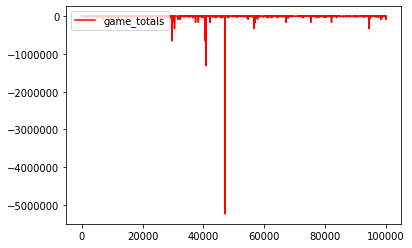

Sum of all Games: 74409220.0

Winning Games: 98164
mean: 929.8086875025467, std: 147.76338049934307, min/max: 0.0/1400.0

Losing Games: 1836
mean: -9185.468409586058, std: 129182.50858512103, min/max: -5242060.0/-40.0
Win Percentage: 98.164
Loss Percentage: 1.836


In [124]:
x = range(len(game_totals))
plt.plot(x, game_totals, '-r', label='game_totals')
plt.legend(loc="upper left")
plt.show()
print(f'Sum of all Games: {np.sum(game_totals)}')
pos = np.where(np.array(game_totals) >= 0)
neg = np.where(np.array(game_totals) < 0)
winning_games = np.array(game_totals)[pos[0]]
losing_games = np.array(game_totals)[neg[0]]
print(f'\nWinning Games: {len(winning_games)}')
print(f'mean: {winning_games.mean()}, std: {winning_games.std()}, min/max: {winning_games.min()}/{winning_games.max()}')

print(f'\nLosing Games: {len(losing_games)}')
print(f'mean: {losing_games.mean()}, std: {losing_games.std()}, min/max: {losing_games.min()}/{losing_games.max()}')

print(f'Win Percentage: {len(winning_games) / len(game_totals) * 100}')
print(f'Loss Percentage: {len(losing_games) / len(game_totals) * 100}')

### Plot the 5 Best Games and the 5 Worst Games

In [125]:
sorted_indices = np.argsort(game_totals)

Worst Game Outcomes: [-5242060. -1309920.  -654500.  -654500.  -326900.]


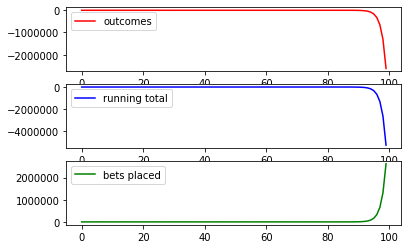

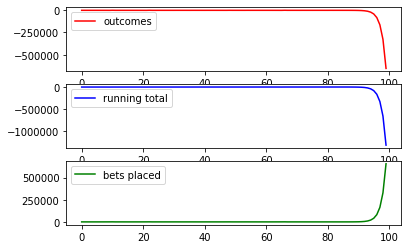

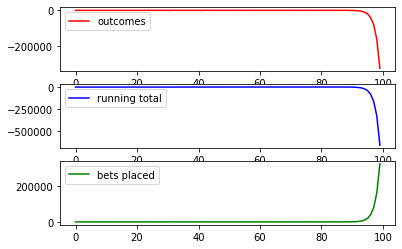

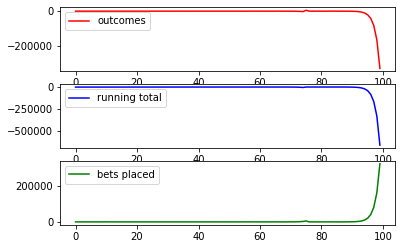

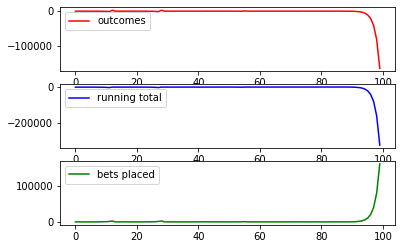

In [126]:
# Plot the 5 worst games
idx = np.array(sorted_indices[range(0, 5)])
gt = np.array(game_totals)
print(f'Worst Game Outcomes: {gt[idx]}')
for i in range(0, 5):
    strategy.plot_history(game_histories[sorted_indices[i]])

Best Game Outcomes: [1360. 1360. 1360. 1360. 1360. 1400.]


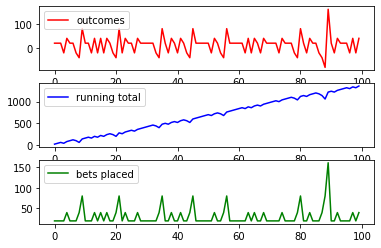

In [ ]:
# Plot the 5 best games
start = len(game_totals) - 1 - 5
idx = np.array(sorted_indices[range(start, len(sorted_indices))])
gt = np.array(game_totals)
print(f'Best Game Outcomes: {gt[idx]}')
for i in range(start, len(game_totals)):
    strategy.plot_history(game_histories[sorted_indices[i]])


### Plot the Win/Loss Streaks

In [ ]:
win_run_histo, _ = np.histogram(runs['win'], bins=num_spins, range=(1, num_spins))
loss_run_histo, _ = np.histogram(runs['loss'], bins=num_spins, range=(1, num_spins))
bins = range(1, num_spins + 1)
max_win_streak = find_max_nonzero_bin(win_run_histo, bins)
max_loss_streak = find_max_nonzero_bin(loss_run_histo, bins)
max_streak = max(max_loss_streak, max_win_streak)

fig, ax = plt.subplots(2, 1)
ax[0].bar(bins, win_run_histo, align='center', label='wins')
ax[0].set_xlim(1, max_streak)
ax[0].legend(loc="upper left")
ax[1].bar(bins, loss_run_histo, align='center', label='losses')
ax[1].set_xlim(1, max_streak)
ax[1].set_xlabel('Streak Length')
ax[1].legend(loc="upper left")
plt.show()
print(f'Maximum length of winning or losing streak: {max_streak}')

### Plot The Game Statistics Outcomes

In [ ]:
red = redblack['red']
black = redblack['black']
other = redblack['other']

In [ ]:
res = [red, black, other]
assert np.sum(res) == num_games * num_spins
labels = ['red', 'black', 'other']
x = range(len(res))
plt.bar(x, res, align='center')
plt.xticks(x, labels)
plt.show()

In [ ]:
black

In [ ]:
other

In [ ]:
5**8

### Plot The Frequencies Of Occurrence Of Each Number

In [ ]:
sorted_numbers = sorted(freq.keys())
values = [freq[n] for n in sorted_numbers]
plt.bar(sorted_numbers, values, align='center')
plt.show()

In [ ]:
# geometric series
a = min_bet
r = 2
n = 21 # Streak Length
terms = [a * r ** (idx - 1) for idx in range(1, n)]
x = range(1, n)
plt.plot(x, terms, '-r')
plt.show()